In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [9]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [10]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [13]:
df.drop(columns =['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
## first hm ya check kty ky Eda perform kr ky kon sy columns hamry liya usefull hain kon sy nhi

In [16]:
pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X =df.drop(columns = ['Exited'],axis=1)
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [21]:
X_train.shape

(8000, 10)

In [ ]:
df.pd.get_dummies()

In [22]:
X_test.shape

(2000, 10)

In [23]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [31]:
X_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [34]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [56]:
#model =Sequential()
#model.add(Dense(3,activation='sigmoid',input_dim=11))
#model.add(Dense(1,activation='sigmoid'))

In [79]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [92]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [93]:
history = model.fit(X_train_scaled,y_train,epochs =100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8670 - loss: 0.3312 - val_accuracy: 0.8619 - val_loss: 0.3435
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8670 - loss: 0.3205 - val_accuracy: 0.8612 - val_loss: 0.3428
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8680 - loss: 0.3206 - val_accuracy: 0.8575 - val_loss: 0.3430
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8665 - loss: 0.3231 - val_accuracy: 0.8644 - val_loss: 0.3419
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8722 - loss: 0.3146 - val_accuracy: 0.8650 - val_loss: 0.3412
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8655 - loss: 0.3293 - val_accuracy: 0.8631 - val_loss: 0.3415
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.3312 - val_accuracy: 0.8631 - val_loss: 0.3424
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8708 - loss: 0.3207 - val_accu

In [83]:
model.layers[0].get_weights()

[array([[ 0.02671166,  0.19295594, -0.16886948, -0.223403  , -0.0540653 ,
          0.12877518, -0.06995269, -0.11930861, -0.05562976, -0.07690032,
         -0.00240378],
        [-0.2806684 ,  0.0257977 ,  0.56183314, -0.12330441,  0.9930566 ,
         -0.4129636 ,  0.6896494 ,  0.10121754, -0.55008936,  1.213493  ,
         -0.1319292 ],
        [ 0.01812155,  0.02135577,  0.08435176, -0.13826093,  0.06822632,
          0.21112858,  0.05497881, -0.08474867, -0.12161816, -0.3802039 ,
          0.34644178],
        [-0.47680634, -0.04114391, -0.21151944, -0.475384  , -0.2955285 ,
         -0.21488748,  0.10098902,  0.32650572, -0.5162793 , -0.69484264,
         -0.19022328],
        [-1.1506501 , -0.20172836,  0.01735255,  0.23769219, -1.0320202 ,
         -0.03784826,  1.1171436 ,  0.8467485 , -0.24065714, -0.04296665,
         -0.24908657],
        [-0.03847716,  0.08912595, -0.2289879 , -0.29606465, -0.02734039,
          0.26534426, -0.0417616 , -0.11529293, -0.31959412, -0.2460316

In [84]:
model.layers[1].get_weights()

[array([[ 0.09749411,  0.7576265 ,  0.05128291, -0.17431414, -0.6487211 ,
         -0.5020086 ,  0.32947156, -0.19390512, -0.4813213 , -0.5869549 ,
          0.42877516],
        [ 0.09332734, -0.2107845 , -0.21307114,  0.29322308,  0.32602957,
          0.27851656, -0.08831607,  0.38572943, -0.41597348,  0.44740197,
         -0.00315872],
        [ 0.07021529,  0.31020477,  0.0302384 ,  0.40509814,  0.6000715 ,
          0.09496989, -0.2543991 ,  0.1808904 ,  0.1405113 ,  0.5110717 ,
         -0.34355628],
        [ 0.236255  ,  0.263631  ,  0.31739268,  0.2681305 ,  0.10357273,
         -0.6242817 ,  0.29914242,  0.0556985 , -0.13654926, -0.10382085,
          0.4314443 ],
        [-0.14934339,  0.33266652, -0.7815435 , -0.7680283 , -0.98593456,
          0.628902  ,  0.50916183,  0.02975687,  0.27748758, -0.23870197,
         -0.13376035],
        [ 0.35846016, -0.6032228 ,  0.37861258, -0.7377554 ,  0.10114159,
         -0.41398785, -0.24331537,  0.33360285, -0.80707806,  0.5223563

In [85]:
model.layers[2].get_weights()

[array([[-0.82044053],
        [ 0.49935547],
        [-0.46690452],
        [-0.5976352 ],
        [-1.1741874 ],
        [-0.9079994 ],
        [ 0.8349931 ],
        [-0.46010983],
        [-1.6259573 ],
        [-0.5166869 ],
        [-0.6907989 ]], dtype=float32),
 array([0.0866804], dtype=float32)]

In [86]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [88]:
y_pred=np.where(y_log>0.5,1,0)

In [89]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8625

In [94]:
import matplotlib.pyplot as plt

In [96]:
history.history

{'accuracy': [0.8687499761581421,
  0.8704687356948853,
  0.8692187666893005,
  0.8684375286102295,
  0.8681250214576721,
  0.8687499761581421,
  0.8692187666893005,
  0.8707812428474426,
  0.8696874976158142,
  0.8692187666893005,
  0.8690624833106995,
  0.8682812452316284,
  0.8681250214576721,
  0.8685937523841858,
  0.8693749904632568,
  0.8681250214576721,
  0.8692187666893005,
  0.8709375262260437,
  0.8678125143051147,
  0.8685937523841858,
  0.8696874976158142,
  0.8701562285423279,
  0.8693749904632568,
  0.8698437213897705,
  0.8715624809265137,
  0.8692187666893005,
  0.87109375,
  0.8695312738418579,
  0.8696874976158142,
  0.8700000047683716,
  0.8687499761581421,
  0.8715624809265137,
  0.8684375286102295,
  0.8695312738418579,
  0.8698437213897705,
  0.8706250190734863,
  0.8712499737739563,
  0.8692187666893005,
  0.8704687356948853,
  0.8717187643051147,
  0.870312511920929,
  0.8706250190734863,
  0.8706250190734863,
  0.8704687356948853,
  0.8704687356948853,
  0.870

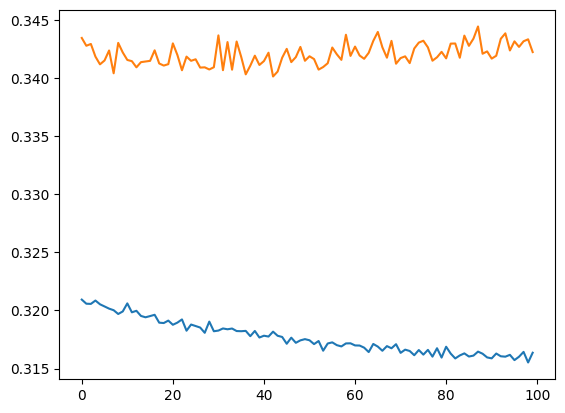

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


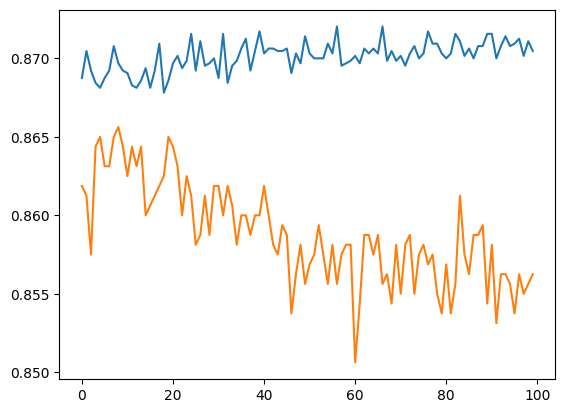

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])